# **정적 웹 페이지 크롤링**

**정적 웹 페이지**
*  서버에 미리 저장된 파일이 그대로 전달되는 웹 페이지
*  서버는 사용자가 요청에 해당하는 저장된 웹 페이지를 보냄
* 사용자는 서버에 저장된 데이터가 변경되지 않는 한 고정된 웹 페이지를 보게 됨  

**동적 웹 페이지**
*  서버에 있는 데이터들을 스크립트에 의해 가공처리한 후 생성되어 전달되는 웹 페이지
*  서버는 사용자의 요청을 해석하여 데이터를 가공한 후 생성되는 웹 페이지를 보냄
*  사용자는 상황, 시간, 요청 등에 따라 달라지는 웹페이지를 보게됨 



**정적 웹 페이지 크롤링을 위한 BeautifulSoup :**</p>
 https://www.crummy.com/software/BeautifulSoup/bs4/doc/
 </p>
*   Beautiful Soup은 HTML 및 XML 문서를 구문분석(parsing)하기위한 Python 패키지
*   HTML의 데이터를 구문 분석 후 구문 분석 트리 구축 가능
*  웹 스크래핑(크롤링)에 사용 

# **HTML 예제**

<html>
 <head>
   <style>
   .re{text-align: center;text-decoration: underline; color: blue;}
   .menu{text-align: center;text-decoration: underline; color: blue;}
   .univ{text-align: center;text-decoration: underline; color: blue;}
  </style>
 </head>
 <body>
  <h1 id="title">
   연구기관 및 대학
  </h1>
  <div class="top">
   <ul class="menu">
    <li>
     <a class="re" href="https://www.nrf.re.kr">
      한국연구재단
     </a>
    </li>
   </ul>
   <ul class="univ">
    <li>
     <a href="http://www.ssu.ac.kr/">
      숭실대학교
     </a>
    </li>
    <li>
     <a href="http://www.snu.ac.kr/">
      서울대학교
     </a>
    </li>
   </ul>
   <table align="left" bgcolor="#00ff00">
    <tr>
     <td>
      학교명
     </td>
     <td>
      주소
     </td>
     <td>
      전화번호
     </td>
    </tr>
    <tr>
     <td>
      숭실대점
     </td>
     <td>
      서울시 동작구 상도로 369
     </td>
     <td>
      02-828-9010
     </td>
    </tr>
   </table>
  </div>
 </body>
</html>


# **CSS 선택자: 태그, id(#), class(.)**

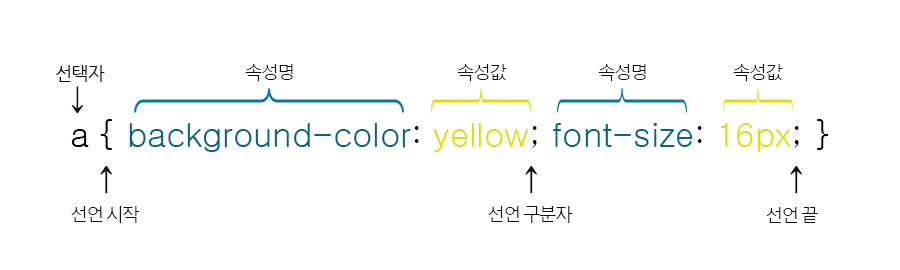

# **BeautifulSoup Exercise**</p>
**1) BeautifulSoup 시작**
</p>
*   BeutifulSoup() 파싱
*   prettify(): html 문서의 계층 구조를 알기 쉽게 보여줍



In [ ]:
from bs4 import BeautifulSoup
#import bs4

html ='<html><head><style>.re{text-align: center;text-decoration: underline; color: blue;}</style></head><body><h1 id="title">연구기관 및 대학</h1><div class ="top"><ul class  = "menu"><li><a class="re" href="https://www.nrf.re.kr">한국연구재단</a></li></ul><ul class  = "univ"><li><a  href="http://www.ssu.ac.kr/">숭실대학교</a></li><li><a  href="http://www.snu.ac.kr/">서울대학교</a></li></ul><table align="left" bgcolor="#00ff00"><tr><td>학교명</td><td>주소</td><td>전화번호</td></tr><tr><td>숭실대점</td><td>서울시 동작구 상도로 369</td><td>02-828-9010</td></tr></table></body></html>'
soup = BeautifulSoup(html, 'html.parser')
soup
print(soup.prettify())

**2) 인덱스 분석**
*   find()
*   find_all()
*   select()


In [ ]:
soup.h1

<h1 id="title">연구기관 및 대학</h1>

In [ ]:
soup.table

<table align="left" bgcolor="#00ff00"><tr><td>학교명</td><td>주소</td><td>전화번호</td></tr><tr><td>숭실대점</td><td>서울시 동작구 상도로 369</td><td>02-828-9010</td></tr></table>

In [ ]:
tag_ul = soup.ul
tag_ul.attrs

{'class': ['menu']}

In [ ]:
tag_ul = soup.find_all('ul')
tag_ul

[<ul class="menu"><li><a class="re" href="https://www.nrf.re.kr">한국연구재단</a></li></ul>,
 <ul class="univ"><li><a href="http://www.ssu.ac.kr/">숭실대학교</a></li><li><a href="http://www.snu.ac.kr/">서울대학교</a></li></ul>]

In [ ]:
tag_ul[1]

<ul class="univ"><li><a href="http://www.ssu.ac.kr/">숭실대학교</a></li><li><a href="http://www.snu.ac.kr/">서울대학교</a></li></ul>

In [ ]:
tag_ul_1 = soup.find('ul')
tag_ul_1

<ul class="menu"><li><a class="re" href="https://www.nrf.re.kr">한국연구재단</a></li></ul>

In [ ]:
tag_ul_1.string

'한국연구재단'

In [ ]:
print(tag_ul[1].string)

None


In [ ]:
tag_li = tag_ul[1].find_all('li')
tag_li

[<li><a href="http://www.ssu.ac.kr/">숭실대학교</a></li>,
 <li><a href="http://www.snu.ac.kr/">서울대학교</a></li>]

In [ ]:
tag_li[0].string

'숭실대학교'

# **정적 웹 페이지 크롤링: 1단계**</p>
할리스커피 홈페이지(http://www.hollys.co.kr) 전국매장정보

**1) 크롤링 허용 여부 확인**</p>

*   수집정책: 크롤링할 주소/robots.txt
*   http://www.robotstxt.org

**2) HTML 코드 확인**</p>

*   오른쪽 마우스 > 페이지 소스 보기
*   Ctrl + U
*  https://www.hollys.co.kr/store/korea/korStore.do?pageNo=1&sido=&gugun=&store=

**3) 코드 작성**

In [ ]:
from bs4 import BeautifulSoup
import urllib.request

In [ ]:
Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore.do?pageNo=1&sido=&gugun=&store='
Hollys_url

'https://www.hollys.co.kr/store/korea/korStore.do?pageNo=1&sido=&gugun=&store='

In [ ]:
html_response = urllib.request.urlopen(Hollys_url)
html=html_response.read()
html

b'<!DOCTYPE html>\r\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="ko" lang="ko">\r\n<head>\r\n\t<title>\xed\x95\xa0\xeb\xa6\xac\xec\x8a\xa4</title>\r\n\t<meta charset="UTF-8">\r\n\r\n\t<meta name="Subject" content="HOLLYS" />\r\n\t<meta name="Title" content="HOLLYS" />\r\n\t<meta name="Keywords" content="HOLLYS,HOLLYS,\xed\x95\xa0\xeb\xa6\xac\xec\x8a\xa4,\xed\x95\xa0\xeb\xa6\xac\xec\x8a\xa4,\xec\xbb\xa4\xed\x94\xbc" />\r\n\t<meta name="Description" content="\xed\x95\xa0\xeb\xa6\xac\xec\x8a\xa4\xeb\x8a\x94 1998\xeb\x85\x84 \xea\xb5\xad\xeb\x82\xb4 \xec\xb2\xab \xec\x97\x90\xec\x8a\xa4\xed\x94\x84\xeb\xa0\x88\xec\x86\x8c \xec\xbb\xa4\xed\x94\xbc\xec\xa0\x84\xeb\xac\xb8\xec\xa0\x90\xec\x9d\x84 \xea\xb0\x9c\xec\xa0\x90\xed\x95\x9c \xec\x88\x9c\xec\x88\x98 \xea\xb5\xad\xeb\x82\xb4\xeb\xb8\x8c\xeb\x9e\x9c\xeb\x93\x9c\xeb\xa1\x9c\xec\x84\x9c \xeb\x8b\xb9\xeb\x8b\xb9\xed\x95\x98\xea\xb2\x8c \xec\x8b\x9c\xec\x9e\xa5 \xec\x84\xa0\xec\xa0\x90\xec\x9d\xb4\xeb\x9d\xbc\xeb\x8a\x94 \xed\x99\x

In [ ]:
soupHollys = 
soupHollys
print(            )

In [ ]:
tag_tbody = 
tag_tbody

In [ ]:
tag_tr= 
tag_tr[0]

In [ ]:
tag_td= 
tag_td

In [ ]:
store_name = 
store_address = 
store_tel = 

In [ ]:
import pandas as pd

Hollys_dic = {'매장이름':store_name, '주소':store_address, '전화번호':store_tel}

Hollys_store = pd.DataFrame(Hollys_dic, index = [0])
Hollys_store

,매장이름,주소,전화번호
0,[부천심곡점],[경기도 부천시 장말로 376 심곡동 355-1],032-612-7258
